Netflix Rec Analysis Prediction

Step1:- Imports and Setup

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Step2:- Data Loading

In [4]:
df= pd.read_excel(r'C:\Users\YASH JAIN\Documents\New Folder\OneDrive\Desktop\CodeBox\python language\panda\netflix_reco_analysis\netflix_data.xlsx')

In [5]:
df

,N_id,Title,Main Genre,Sub Genres,Release Year,Maturity Rating,Original Audio,Recommendations
0,215309,Ace Ventura: Pet Detective,Comedy,"Comedy, Mystery, US",1994.0,A,"Hindi, English [Original]","70184054, 60001650, 70112729, 70027007, 115246..."
1,215318,Ace Ventura: When Nature Calls,Comedy,"Comedy, Action & Adventure, US",1995.0,U/A 16+,"Hindi, English [Original]","70184054, 60001650, 70112729, 70027007, 115246..."
2,217258,The Addams Family,Comedy,"Comedy, US",1991.0,U/A 13+,"English [Original], Hindi, English - Audio Des...","81156676, 81231974, 70027007, 80049939, 702179..."
3,217303,Addams Family Values,Comedy,"Comedy, US",1993.0,U/A 13+,"English [Original], Hindi, English - Audio Des...","81156676, 70044593, 81231974, 70027007, 800500..."
4,235527,Agneepath,Drama,"Hindi-Language, Bollywood, Crime, Drama",1990.0,U/A 16+,Hindi [Original],"17517355, 80158546, 80158395, 80074065, 702042..."
...,...,...,...,...,...,...,...,...
6398,81988312,Laila Majnu,Romance,"Hindi-Language, Bollywood, Drama, Romantic, Ba...",2018.0,U/A 13+,Hindi [Original],"80065328, 81994054, 80087743, 81423081, 819940..."
6399,81988313,Veere Di Wedding,Comedy,"Hindi-Language, Bollywood, Comedy",2018.0,U/A 16+,Hindi [Original],"70181653, 80065328, 81672746, 80032081, 703034..."
6400,81992621,Paw Patrol Holiday Fireplace,Kids,"Kids Music, Special Interest",2024.0,U,No Dialogue [Original],"81294811, 81154166, 81272431, 81640914, 815003..."
6401,81994051,Notebook,Drama,"Hindi-Language, Bollywood, Drama, Romantic, So...",2019.0,U/A 7+,Hindi [Original],"80080110, 80065328, 81994054, 80087743, 819883..."


Step3:- Data Cleaning and Preprocessing

check a data types of columns and values

In [6]:
col=df.columns
d_type=[]
for i in col:
    d_type.append(type(df.loc[0,i]))
print("data types of the values that present in a columns\n",d_type)

print("\n")

c_type=df.info()
print("data types of columns\n",c_type)

data types of the values that present in a columns
 [<class 'numpy.int64'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'numpy.float64'>, <class 'str'>, <class 'str'>, <class 'str'>]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6403 entries, 0 to 6402
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   N_id             6403 non-null   int64  
 1   Title            6403 non-null   object 
 2   Main Genre       6403 non-null   object 
 3   Sub Genres       6403 non-null   object 
 4   Release Year     6402 non-null   float64
 5   Maturity Rating  6403 non-null   object 
 6   Original Audio   3767 non-null   object 
 7   Recommendations  6392 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 400.3+ KB
data types of columns
 None


count a missing and NaN values 

In [7]:
print("Missing values in columns")
print(df.isna().sum())

Missing values in columns
N_id                  0
Title                 0
Main Genre            0
Sub Genres            0
Release Year          1
Maturity Rating       0
Original Audio     2636
Recommendations      11
dtype: int64


Convert the numiric string in numric number and non numrinc string replace with NaN

In [8]:
# errors="coerce"  fill the nan insted of the non numric string or number
# pd.to_numeric(df["Release Year"]) convert the numiric string in numric number
# if type(df.loc[0,["Release Year"]])!= "<class 'numpy.float64'>": this is wrong comparision

if type(df.loc[0,"Release Year"])!= np.float64:
    print("ysash")
    df["Release Year"]=pd.to_numeric(df["Release Year"], errors="coerce")

If there are nulls in 'Release Year', we can decide to fill them with the median year

In [9]:
if df["Release Year"].isna().sum() != 0:
    print("check point of nan present")
    df["Release Year"] = df['Release Year'].fillna(df["Release Year"].median())

check point of nan present


Handle Duplicate Data

In [10]:
if (df.duplicated().sum() != 0):
    df.drop_duplicates(inplace=True)

In [11]:
# recheck a missing value after the filling value in missing value
print(df.isna().sum())

N_id                  0
Title                 0
Main Genre            0
Sub Genres            0
Release Year          0
Maturity Rating       0
Original Audio     2636
Recommendations      11
dtype: int64


In [12]:
df["Release Year"].value_counts()

Release Year
2022.0    963
2023.0    898
2021.0    770
2024.0    673
2020.0    661
2019.0    558
2018.0    517
2017.0    321
2016.0    208
2015.0    124
2014.0     79
2013.0     69
2011.0     51
2012.0     50
2010.0     42
2009.0     39
2006.0     35
2008.0     34
2007.0     30
2005.0     27
2004.0     26
2025.0     24
2001.0     18
2002.0     17
2003.0     17
2000.0     15
1998.0     14
1999.0     12
1994.0     11
1997.0     10
1995.0      9
1992.0      9
1993.0      9
1991.0      7
1996.0      7
1984.0      4
1986.0      4
1988.0      4
1989.0      4
1990.0      3
1987.0      3
1981.0      3
1973.0      2
1980.0      2
1979.0      2
1966.0      2
1983.0      2
1962.0      2
1977.0      2
1978.0      2
1971.0      2
1972.0      1
1985.0      1
1982.0      1
1975.0      1
1974.0      1
1969.0      1
Name: count, dtype: int64

# Exploratory Data Analysis

## Histogram for Release Year distribution

C:\Users\YASH JAIN\AppData\Local\Temp\ipykernel_20076\2199510077.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


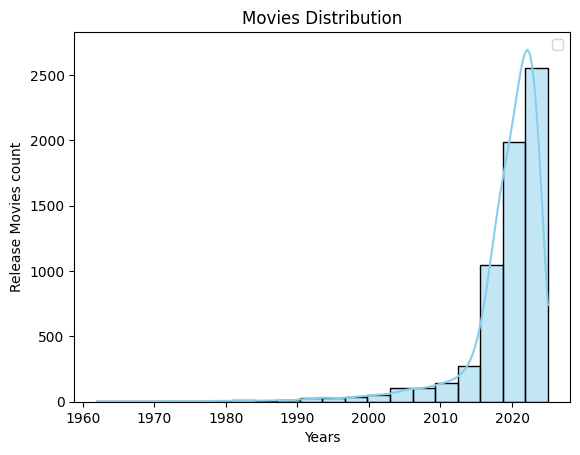

In [13]:
sns.histplot(df['Release Year'], kde=True, bins=20, color='skyblue') #by seaborn
# plt.hist(df["Release Year"],bins=20,color='skyblue') #by matplotlib
plt.title("Movies Distribution")
plt.xlabel("Years")
plt.ylabel("Release Movies count")
plt.legend()
plt.show()

## Count plot for Main Genre distribution

<class 'str'>


C:\Users\YASH JAIN\AppData\Local\Temp\ipykernel_20076\3637338981.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Main Genre', order=df['Main Genre'].value_counts().index, palette='viridis')


Text(0, 0.5, 'Count')

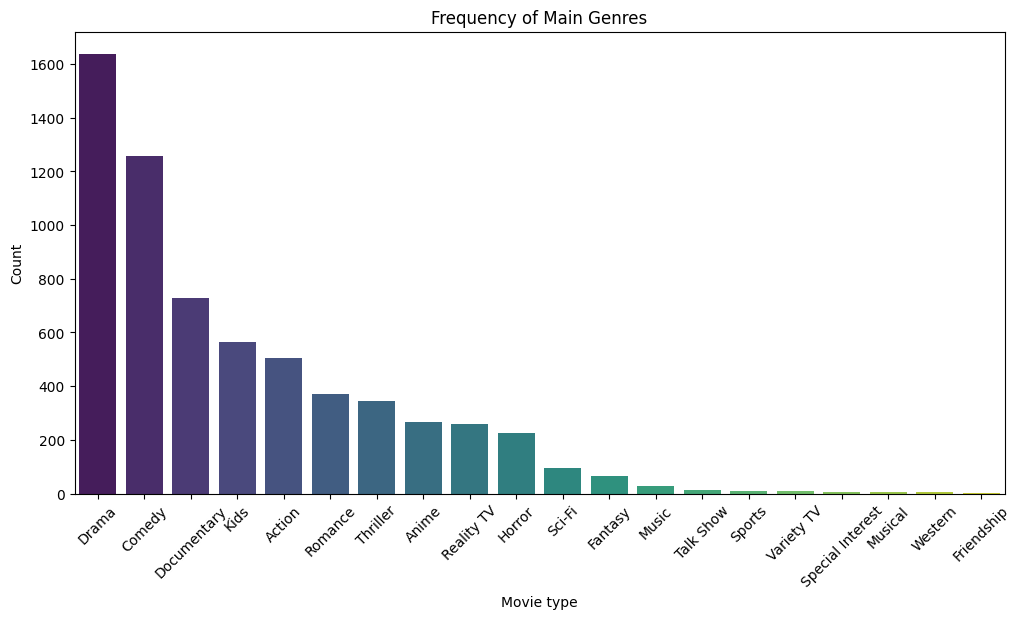

In [15]:
print(type(df.loc[0,"Main Genre"]))
df["Main Genre"].value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Main Genre', order=df['Main Genre'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Frequency of Main Genres')
plt.xlabel("Movie type")
plt.ylabel("Count")


In [ ]:
# x=df["Main Genre"].unique()
y = df["Main Genre"].value_counts().values
x = df["Main Genre"].value_counts().index
print(x ,y)

Index(['Drama', 'Comedy', 'Documentary', 'Kids', 'Action', 'Romance',
       'Thriller', 'Anime', 'Reality TV', 'Horror', 'Sci-Fi', 'Fantasy',
       'Music', 'Talk Show', 'Sports', 'Variety TV', 'Special Interest',
       'Musical', 'Western', 'Friendship'],
      dtype='object', name='Main Genre') [1639 1259  730  566  506  369  346  267  259  225   97   66   27   14
   11    8    5    4    4    1]


<class 'str'>


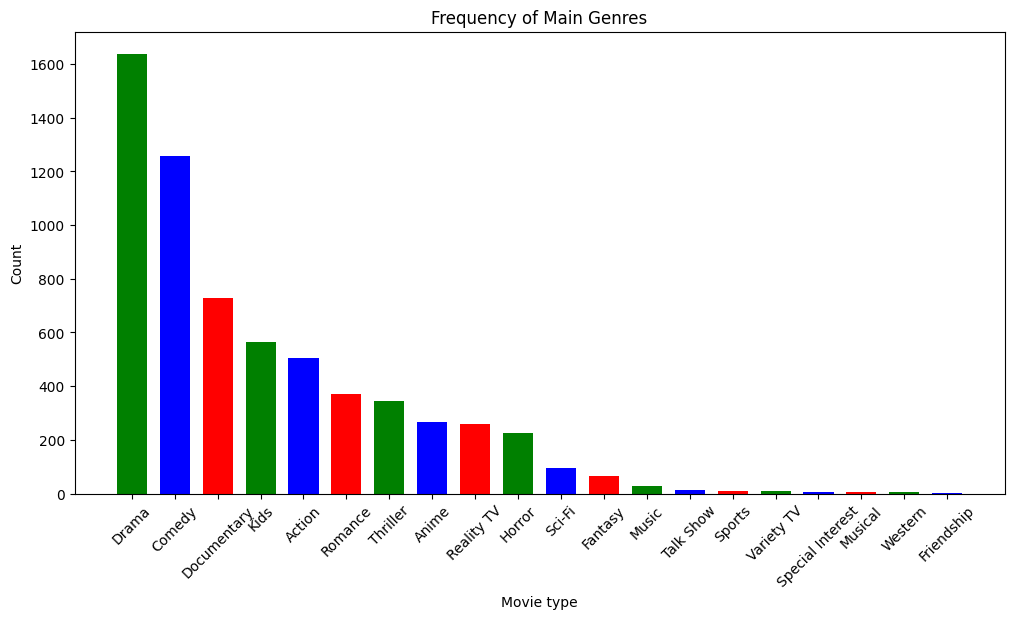

In [ ]:
print(type(df.loc[0,"Main Genre"]))
df["Main Genre"].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(x,y,width=0.7, color=["g","b","r"])
plt.xticks(rotation=45)
plt.title('Frequency of Main Genres')
plt.xlabel("Movie type")
plt.ylabel("Count")
# plt.legend() #plt.bar() does not have labeled categories,
plt.show()

C:\Users\YASH JAIN\AppData\Local\Temp\ipykernel_16776\1861168955.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Maturity Rating', y='Release Year', palette='Set2')


<Axes: xlabel='Maturity Rating', ylabel='Release Year'>

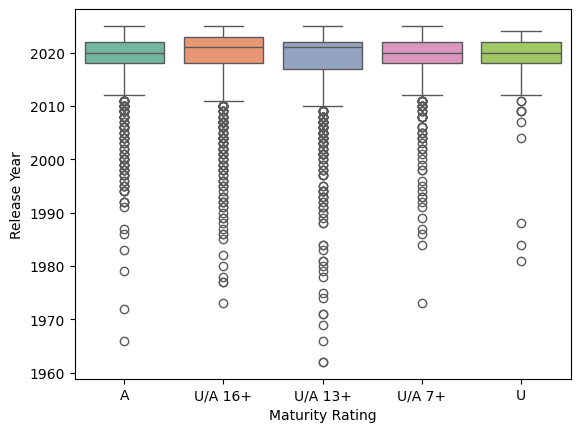

In [ ]:
sns.boxplot(data=df, x='Maturity Rating', y='Release Year', palette='Set2')